In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Иницилизация

In [ ]:
a,b = 0,1
n = 100
const = n * 1000
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
eps = 0.001
s_const = 1
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
right_side_new = np.full(const,np.NAN,dtype=np.ndarray)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [ ]:
for i in range(n):
    real_one[i] = np.sin(x[i])

In [ ]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [ ]:
def y_star(t: float):
    return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.sin(t) * np.exp(4) + np.sin(1) * t * np.exp(3 + t) + np.sin(1) * t * np.exp(3 - t) - np.sin(1) * t * np.exp(1 + t) - np.sin(1) * t * np.exp(1 - t) - np.sin(t) * 2 * np.exp(2) - np.sin(1) * 2 * np.exp(3 + t) + np.sin(1) * 2 * np.exp(3 - t) + np.sin(t))


In [ ]:
def norma_L2(f: np.ndarray):
    sum = 0
    for i in range(1, n-1):
        sum += (np.abs(f[i]) ** 2)
    sum *= 2
    sum += (np.abs(f[0]) ** 2) + (np.abs(f[n-1]) ** 2)
    return np.sqrt((h/2) * sum)

In [ ]:
for i in range(n):
    right_side[i] = y_star(t[i])
right_side_new[0] = right_side

In [ ]:
for i in range(n):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [ ]:
for i in range(const -1):
    right_side_new[i+1] = right_side_new[i] + s_const * (right_side - np.dot(left_side,right_side_new[i]))
     

In [ ]:
# for_graph = np.full(n,np.nan)
# for i in range(n):
#     for_graph[i] = np.max(np.abs(right_side_new[i] - real_one))
for_graph = np.full(const,np.nan)
# for i in range(const):
#     for_graph[i] = np.abs(norma_L2(right_side_new[i] - real_one))
for i in range(const):
    for_graph[i] = np.abs(np.linalg.norm(right_side_new[i] - real_one))

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'график максимальной невязки от итерации')
# plt.plot(np.linspace(0,99,100),for_graph,label = 'численное решение',color = 'red')
plt.plot(for_graph,label = 'численное решение',color = 'red')
# plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x,right_side_new[-1],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} 252 слой')
plt.plot(x,right_side_new[252],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

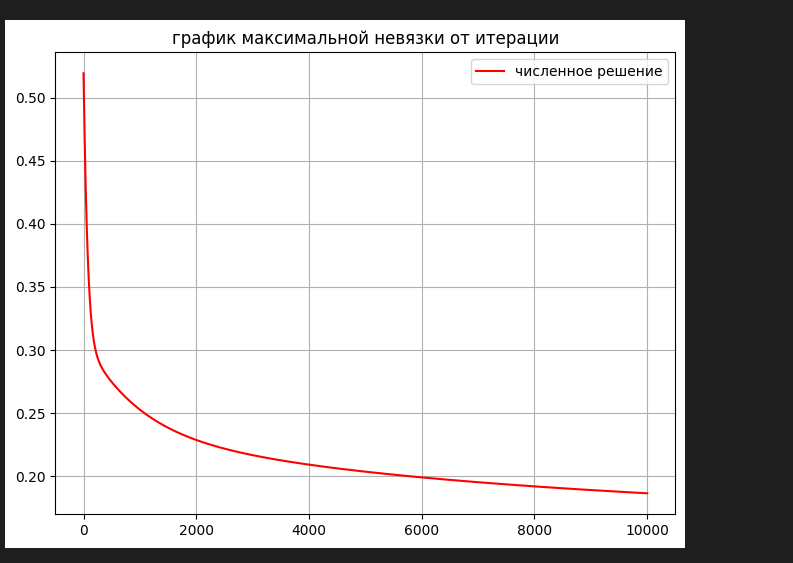
s_const = 1 n = 100 * 100

# Реализация с шумом

In [ ]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a,b = 0,1
n = 100
const = n * 1000
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
eps = 0.001
s_const = 1
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
right_side_new = np.full(const,np.NAN,dtype=np.ndarray)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [ ]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [ ]:
# for i in range(n):
#     real_one[i] = np.sin(x[i])
    
# def phi(s: float) -> float:
#     # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
#         return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

# def theta(s: float) -> float:
#     # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
#     return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

# def y(x: float,eps: float) -> float:
#     return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)

# def y_star(t: float) -> float:
#     sum = 0
#     for i in range(1, n-1):
#         if x[i] < t:
#             sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i],eps)
#             # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
#         else:
#             # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
#             sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i],eps)
#     sum *= 2
#     sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0],eps) + \
#         theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1],eps)
#     return (h/2) * sum

In [ ]:
for i in range(n):
    real_one[i] = np.sin(x[i])
    
def phi(s: float) -> float:
    # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
        return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

def theta(s: float) -> float:
    # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
    return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

def okok(x: float,eps: float) -> float:
    return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)
y = np.full(n,np.nan)
for i in range(n):
    y[i] = okok(x[i],eps)
def y_star(t: float) -> float:
    sum = 0
    for i in range(1, n-1):
        if x[i] < t:
            sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y[i]
            # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
        else:
            # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
            sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y[i]
    sum *= 2
    sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y[0] + \
        theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y[n-1]
    return (h/2) * sum

In [ ]:
def norma_L2(f: np.ndarray):
    sum = 0
    for i in range(1, n-1):
        sum += (np.abs(f[i]) ** 2)
    sum *= 2
    sum += (np.abs(f[0]) ** 2) + (np.abs(f[n-1]) ** 2)
    return np.sqrt((h/2) * sum)

In [ ]:
for i in range(n):
    right_side[i] = y_star(t[i])
right_side_new[0] = right_side

In [ ]:
for i in range(n):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [ ]:
for i in range(const -1):
    right_side_new[i+1] = right_side_new[i] + s_const * (right_side - np.dot(left_side,right_side_new[i]))
     

In [ ]:
# for_graph = np.full(n,np.nan)
# for i in range(n):
#     for_graph[i] = np.max(np.abs(right_side_new[i] - real_one))
for_graph = np.full(const,np.nan)
for i in range(const):
    for_graph[i] = np.abs(norma_L2(right_side_new[i] - real_one))
# for i in range(const):
#     for_graph[i] = np.abs(np.linalg.norm(right_side_new[i] - real_one))

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'график максимальной невязки от итерации')
# plt.plot(np.linspace(0,99,100),for_graph,label = 'численное решение',color = 'red')
plt.plot(for_graph,label = 'численное решение',color = 'red')
# plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x,right_side_new[-1],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

# Реализация 3(обрезание решения)

In [562]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

In [563]:
a,b = 0,1
n = 100
const = n * 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
eps = 0.001
s_const = 1
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
right_side_new = np.full(const,np.NAN,dtype=np.ndarray)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [564]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [565]:
for i in range(n):
    real_one[i] = np.sin(x[i])
    
def phi(s: float) -> float:
    # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
        return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

def theta(s: float) -> float:
    # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
    return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

def okok(x: float,eps: float) -> float:
    return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)
y = np.full(n,np.nan)
for i in range(n):
    y[i] = okok(x[i],eps)
def y_star(t: float) -> float:
    sum = 0
    for i in range(1, n-1):
        if x[i] < t:
            sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y[i]
            # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
        else:
            # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
            sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y[i]
    sum *= 2
    sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y[0] + \
        theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y[n-1]
    return (h/2) * sum

In [566]:
def norma_L2(f: np.ndarray):
    sum = 0
    for i in range(1, n-1):
        sum += (np.abs(f[i]) ** 2)
    sum *= 2
    sum += (np.abs(f[0]) ** 2) + (np.abs(f[n-1]) ** 2)
    return np.sqrt((h/2) * sum)

In [567]:
for i in range(n):
    right_side[i] = y_star(t[i])
right_side_new[0] = right_side

In [568]:
for i in range(n):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [569]:
for i in range(const -1):
    right_side_new[i+1] = right_side_new[i] + s_const * (right_side - np.dot(left_side,right_side_new[i]))
     

In [570]:
# for_graph = np.full(n,np.nan)
# for i in range(n):
#     for_graph[i] = np.max(np.abs(right_side_new[i] - real_one))
for_graph = np.full(const,np.nan)
# for i in range(const):
#     for_graph[i] = np.abs(norma_L2(right_side_new[i][0:70] - real_one[0:70]))
for i in range(const):
    for_graph[i] = np.abs(np.linalg.norm(right_side_new[i][0:50] - real_one[0:50]))
# for i in range(const):
#     for_graph[i] = np.abs(np.linalg.norm(right_side_new[i] - real_one))

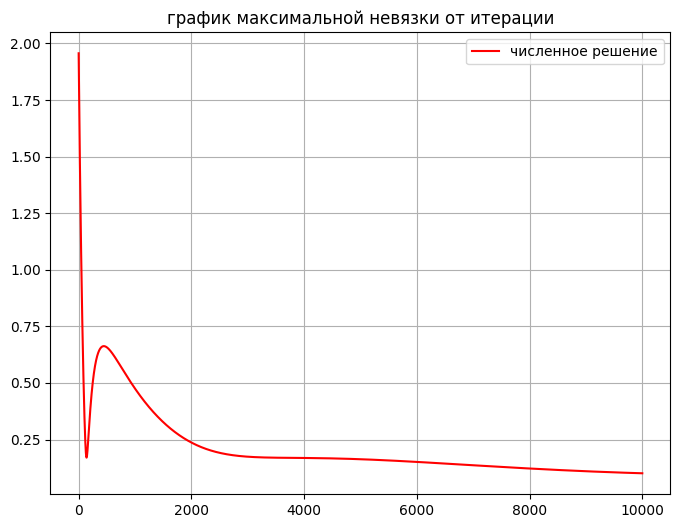

In [571]:
plt.figure(figsize=(8, 6))
plt.title(f'график максимальной невязки от итерации')
# plt.plot(np.linspace(0,99,100),for_graph,label = 'численное решение',color = 'red')
plt.plot(for_graph,label = 'численное решение',color = 'red')
# plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

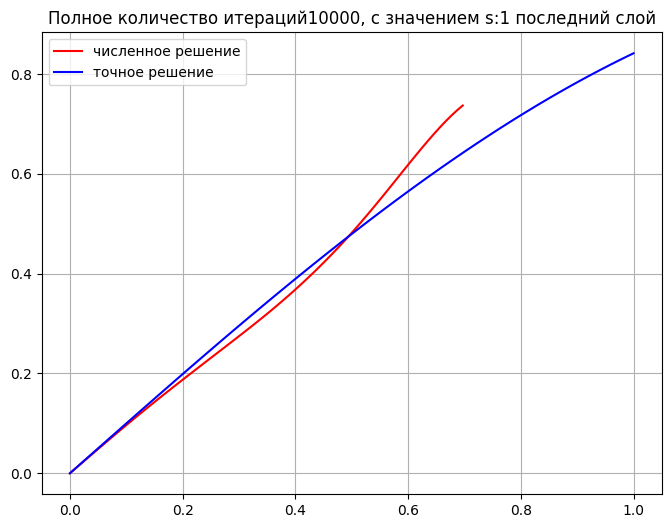

In [572]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x[0:70],right_side_new[-1][0:70],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

IndexError: index 5000 is out of bounds for axis 0 with size 1000

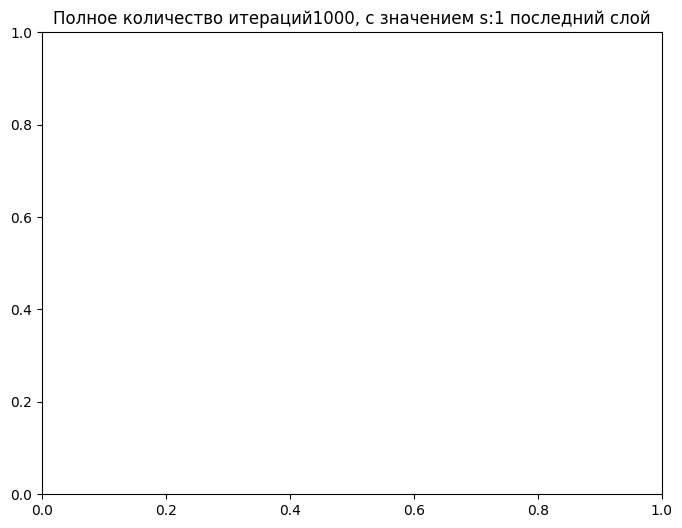

In [561]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x[0:70],right_side_new[5000][0:70],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

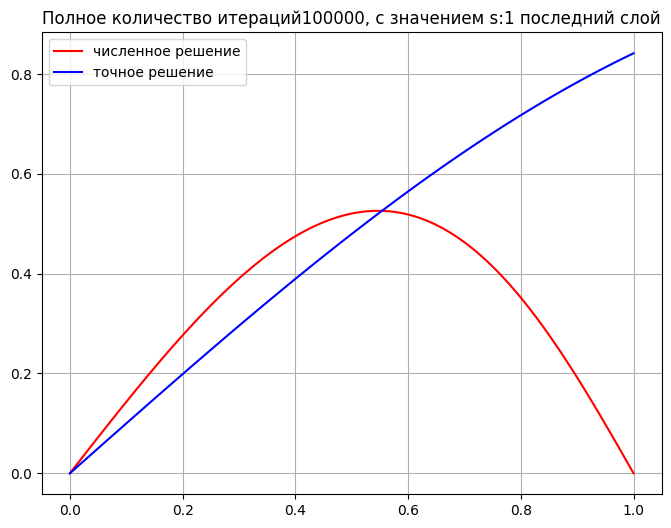

In [539]:
plt.figure(figsize=(8, 6))
plt.title(f'Полное количество итераций{const}, с значением s:{s_const} последний слой')
plt.plot(x,right_side_new[250],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [510]:
right_side_new[0][0:70]

array([0.        , 0.0001511 , 0.00030207, 0.00045278, 0.0006031 ,
       0.00075289, 0.00090204, 0.00105039, 0.00119784, 0.00134424,
       0.00148948, 0.00163342, 0.00177594, 0.0019169 , 0.0020562 ,
       0.0021937 , 0.00232927, 0.00246281, 0.00259418, 0.00272327,
       0.00284996, 0.00297413, 0.00309567, 0.00321447, 0.00333042,
       0.0034434 , 0.00355331, 0.00366004, 0.0037635 , 0.00386357,
       0.00396015, 0.00405316, 0.00414248, 0.00422804, 0.00430974,
       0.00438749, 0.00446121, 0.00453083, 0.00459625, 0.0046574 ,
       0.00471421, 0.00476661, 0.00481453, 0.0048579 , 0.00489668,
       0.0049308 , 0.0049602 , 0.00498483, 0.00500466, 0.00501963,
       0.00502971, 0.00503486, 0.00503505, 0.00503024, 0.00502043,
       0.0050056 , 0.00498572, 0.00496079, 0.0049308 , 0.00489575,
       0.00485565, 0.00481049, 0.0047603 , 0.0047051 , 0.0046449 ,
       0.00457975, 0.00450966, 0.00443468, 0.00435486, 0.00427024])